In [1]:
from profiler.core import *

In [2]:
pf = Profiler(workers = 2, tol=1e-6, eps=0.05, embedtxt=True)

In [3]:
pf.session.load_data(name='ttt', src=FILE, fpath='./hce_data/ttt/ttt.csv', check_param=True, na_values='empty')

INFO:profiler.utility:[0.008725404739379883] Load Data start

INFO:profiler.data.dataset:parameters used for data loading:
 {'na_values': 'empty', 'sep': ',', 'header': 'infer', 'dropcol': None, 'dropna': False, 'encoding': 'utf-8', 'normalize': True, 'min_categories_for_embedding': 10}
INFO:profiler.data.dataset:inferred types of attributes: {
    "tls": "categorical",
    "tms": "categorical",
    "trs": "categorical",
    "mls": "categorical",
    "mms": "categorical",
    "mrs": "categorical",
    "bls": "categorical",
    "bms": "categorical",
    "brs": "categorical",
    "class": "categorical"
}
INFO:profiler.data.dataset:(possible types: numeric, categorical, text, date)
INFO:profiler.data.dataset:inferred operators of attributes: {'tls': ['equal'], 'tms': ['equal'], 'trs': ['equal'], 'mls': ['equal'], 'mms': ['equal'], 'mrs': ['equal'], 'bls': ['equal'], 'bms': ['equal'], 'brs': ['equal'], 'class': ['equal']}
INFO:profiler.data.dataset:(possible operators: equal, notequal, gre

In [4]:
# pf.session.change_dtypes(['tls', 'ZipCode', 'PhoneNumber', 'State', 'EmergencyService','Score', 'Sample'], 
#                             [CATEGORICAL, NUMERIC, CATEGORICAL, TEXT, TEXT, NUMERIC, NUMERIC],
#                             [None, None, None, None, None, r'(\d+)%', r'(\d+)\spatients'])

In [5]:
pf.session.load_training_data(multiplier = 100)

INFO:profiler.utility:[0.07226777076721191] Create Training Data start

INFO:profiler.data.transformer:Draw Pairs
100%|██████████| 10/10 [00:00<00:00, 95.53it/s]
INFO:profiler.data.transformer:Number of training samples: 95800
INFO:profiler.data.transformer:Computing Differences
INFO:profiler.data.transformer:estimated missing data probability in training data is 0.0000
INFO:profiler.utility:[0.5498208999633789] Create Training Data execution time: 0.477553129196167



In [6]:
# set sparsity to 0 for exp_reproduce 
autoregress_matrix = pf.session.learn_structure(sparsity=0, infer_order=True)

INFO:profiler.utility:[0.5559422969818115] Learn Structure start

INFO:profiler.learner:use threshold 0.1549
INFO:profiler.utility:[0.6348738670349121] Learn Structure execution time: 0.07893157005310059



In [7]:
parent_sets = pf.session.get_dependencies(score="fit_error")

INFO:profiler.utility:[0.6399154663085938] Get Dependencies start

INFO:profiler.utility:[0.6841955184936523] Get Dependencies execution time: 0.044280052185058594



mms -> class (0.2449842264756352)
mrs -> bls (0.2294761122187815)
mrs -> tls (0.2293582094292892)
trs -> bms (0.22369367076110597)
trs -> mls (0.22468777144239124)
mls -> brs (0.2289674924766764)
brs -> tms (0.22484090568896695)


/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


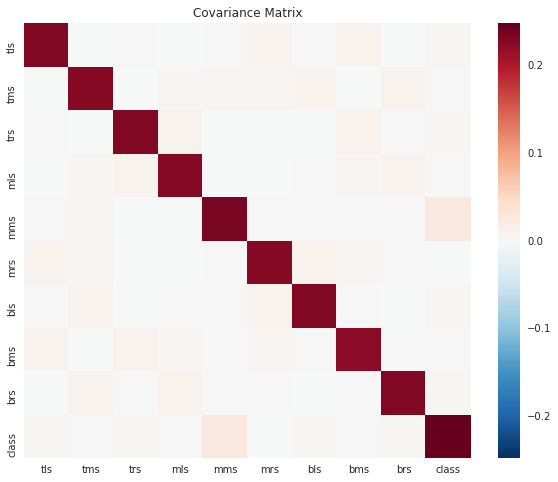

In [8]:
pf.session.visualize_covariance()

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


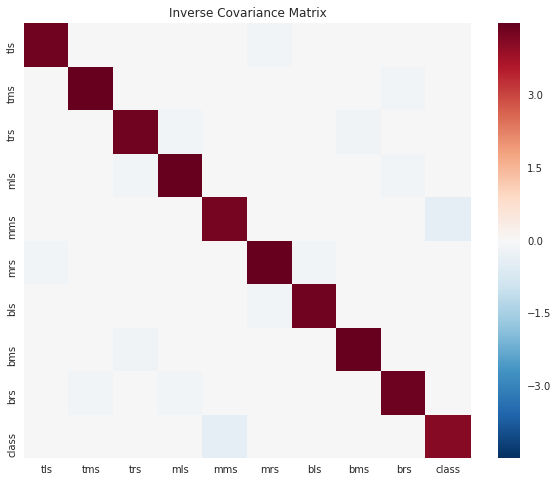

threshold =  20
sum =  [0.16233635 0.17121252 0.35883424 0.33311241 0.4461539  0.33660928
 0.17427293 0.1861022  0.3315929  0.4461539 ]
attr =  Index(['tls', 'tms', 'trs', 'mls', 'mms', 'mrs', 'bls', 'bms', 'brs', 'class'], dtype='object')
Attr w/o dependency: 
 Index([['tls'], ['tms'], ['trs'], ['mls'], ['mms'], ['mrs'], ['bls'], ['bms'],
       ['brs'], ['class']],
      dtype='object')


Attr w/ dependency: 
 Index([], dtype='object')


In [9]:
pf.session.visualize_inverse_covariance()

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


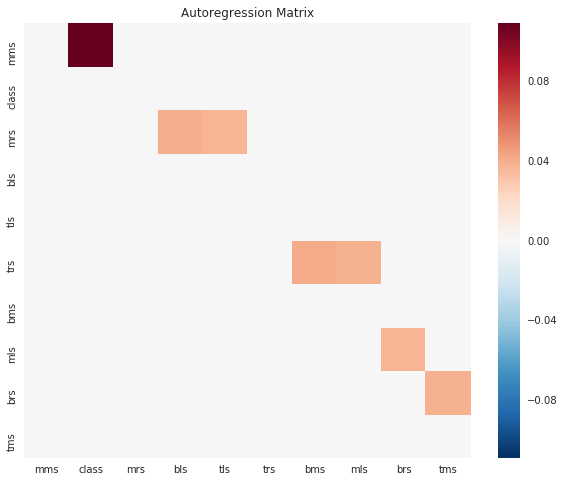

In [10]:
pf.session.visualize_autoregression()

In [11]:
pf.session.timer.get_stat()

,time_point,msg,execution_time
0,0.008725,start: Load Data,0.000000
1,0.058016,end: Load Data,0.049291
2,0.072268,start: Create Training Data,0.000000
3,0.549821,end: Create Training Data,0.477553
4,0.555942,start: Learn Structure,0.000000
5,0.634874,end: Learn Structure,0.078932
6,0.639915,start: Get Dependencies,0.000000
7,0.684196,end: Get Dependencies,0.044280
8,0.684196,total_execution_time,0.650055


In [12]:
pf.session.timer.to_csv()